### Load Data / Brief Introduction

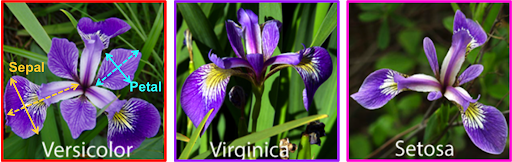

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

# load_iris()['data']
# load_iris()['feature_names']
# load_iris()['target']
# load_iris()['target_names']

# Feature Names (x)
# iris['feature_names']
# To distinguish (y)
# iris['target_names']

df_iris = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
df_iris['Type'] = iris['target']
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
df_iris['Type'].astype(str)[0]

'0'

In [4]:
### Assign Name to each type, instead of 0, 1, and 2, with column name - Target Names
### Why?
### 실습 0 - 'setosa' / 1 - 'versicolor' / 2 - 'virginica'

# 예시
# Dictionary 사용한 apply가 가장 좋을듯..
import time

before = time.time()
df_iris['Target Names'] = df_iris['Type'].astype(str).str.replace('0', 'Setosa').str.replace('1', 'Versicolor').str.replace('2', 'Virginica')
after = time.time()

print(after - before)


before = time.time()
dict_keys = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df_iris['Target Names'] = df_iris['Type'].apply(lambda x: dict_keys[x])
after = time.time()

print(after - before)

0.006000518798828125
0.0010018348693847656


In [5]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type,Target Names
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Virginica
146,6.3,2.5,5.0,1.9,2,Virginica
147,6.5,3.0,5.2,2.0,2,Virginica
148,6.2,3.4,5.4,2.3,2,Virginica


### Visualization

#### Correlation Plot

In [6]:
df_iris[df_iris.columns[:4]].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


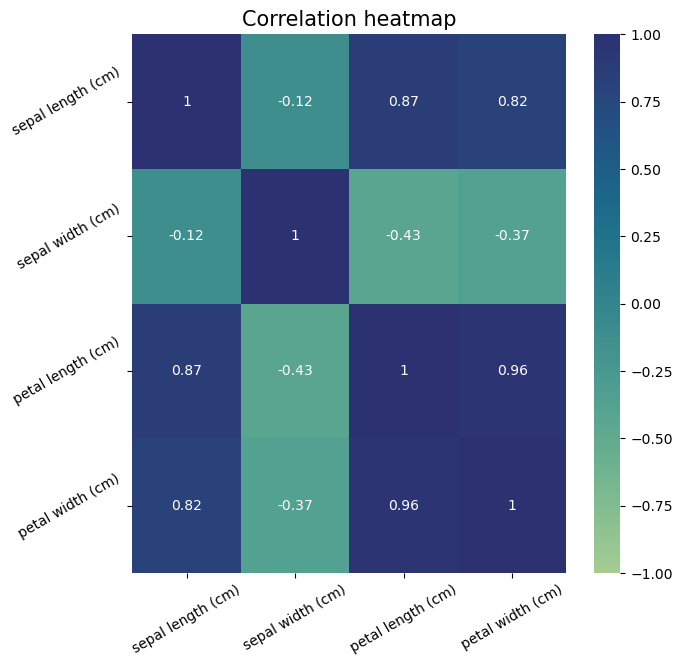

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(7,7))
sns.heatmap(df_iris[df_iris.columns[:4]].corr(), annot=True, cbar=True, vmin=-1, vmax=1, cmap="crest")
axes.tick_params(labelrotation=30)
plt.title('Correlation heatmap', fontsize = 15)

plt.show()

### 다양한 그래프

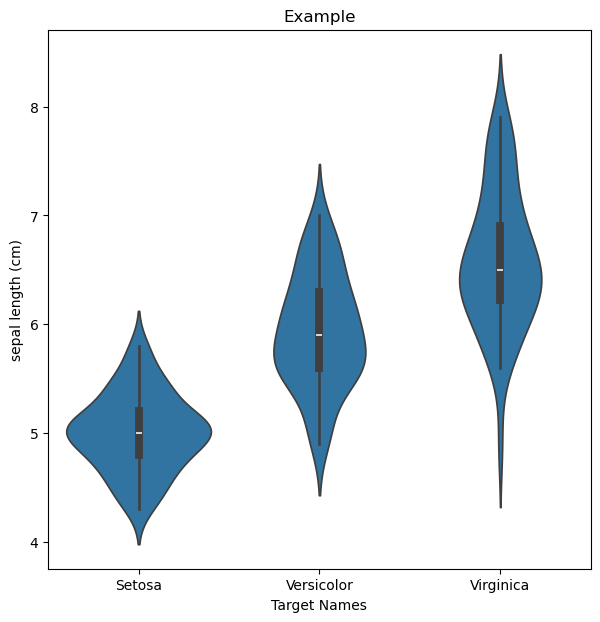

In [8]:
# violin plot

fig, axes = plt.subplots(figsize=(7,7))
sns.violinplot(x='Target Names', y='sepal length (cm)', data=df_iris)
plt.title('Example')
plt.show()

C:\Users\jaehwanc\AppData\Local\Temp\ipykernel_29368\271867511.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Target Names', y=columns_to_plot, data=df_iris, inner='quart', palette={"Versicolor": "g", "Setosa": "b", "Virginica": "m"})
C:\Users\jaehwanc\AppData\Local\Temp\ipykernel_29368\271867511.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Target Names', y=columns_to_plot, data=df_iris, inner='quart', palette={"Versicolor": "g", "Setosa": "b", "Virginica": "m"})
C:\Users\jaehwanc\AppData\Local\Temp\ipykernel_29368\271867511.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue`

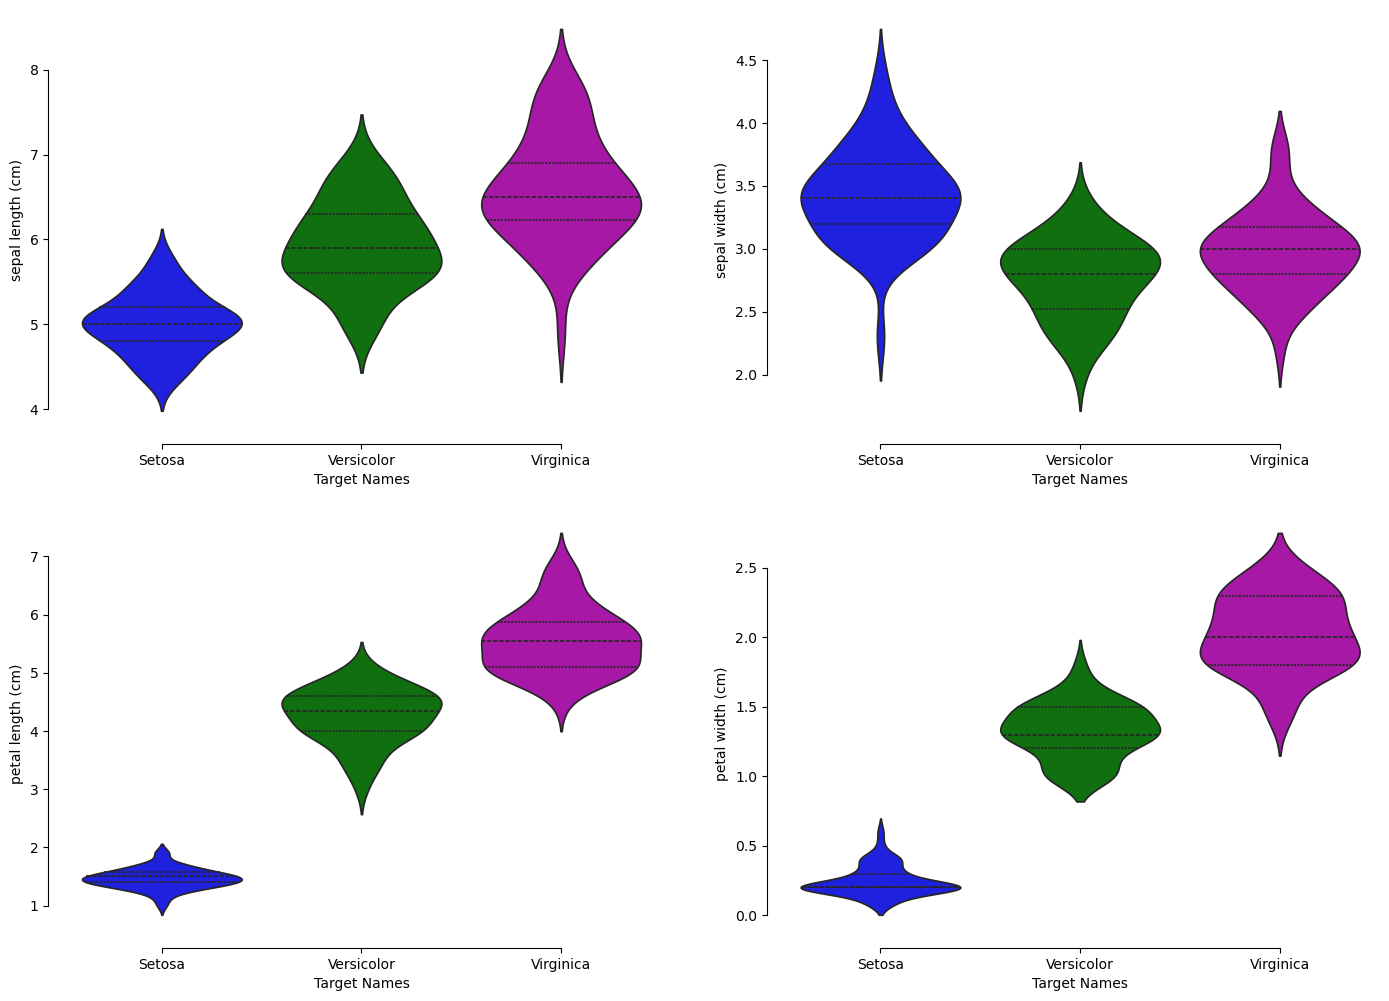

In [9]:
# Violin Plot

def plot_violin(columns_to_plot, i):
    plt.subplot(2, 2, i)
    sns.violinplot(x='Target Names', y=columns_to_plot, data=df_iris, inner='quart', palette={"Versicolor": "g", "Setosa": "b", "Virginica": "m"})
    # plt.ylim((0, 10))

plt.figure(figsize=(17,12))
i = 1

for column in ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']:
    plot_violin(column, i)
    sns.despine(offset=10, trim=True)
    i += 1

plt.show()

In [10]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type,Target Names
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Virginica
146,6.3,2.5,5.0,1.9,2,Virginica
147,6.5,3.0,5.2,2.0,2,Virginica
148,6.2,3.4,5.4,2.3,2,Virginica


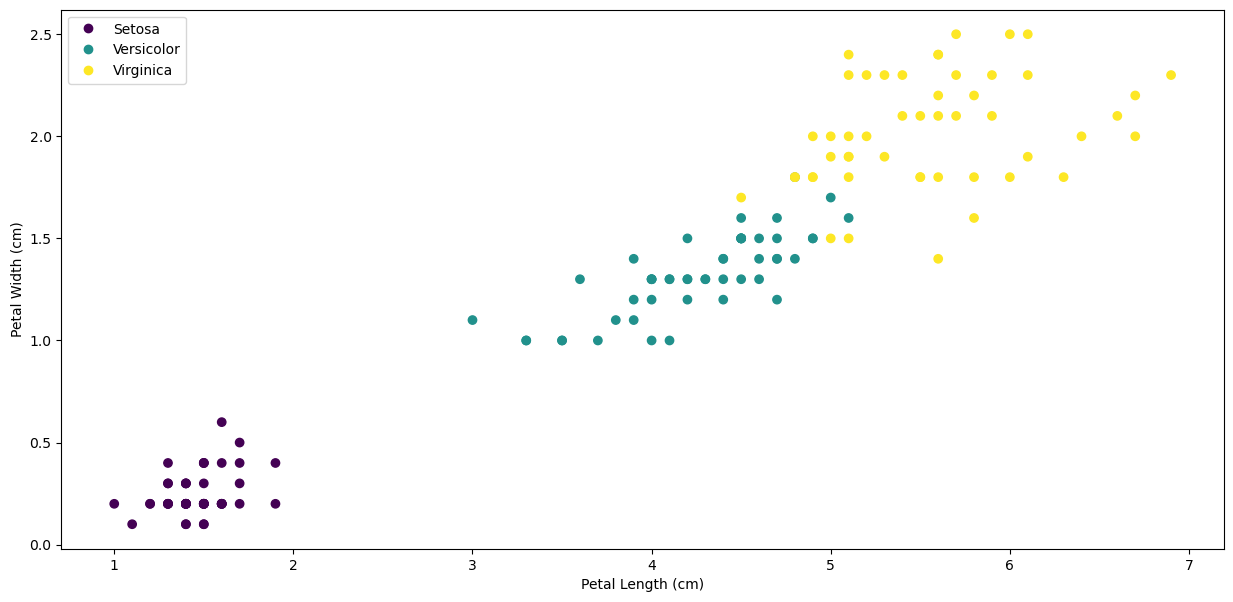

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
scatter = ax.scatter(data=df_iris, x='petal length (cm)', y='petal width (cm)', c=df_iris['Type'])
ax.set(xlabel='Petal Length (cm)', ylabel='Petal Width (cm)')
fig = ax.legend(scatter.legend_elements()[0], df_iris['Target Names'].unique(), loc=0)
plt.show()

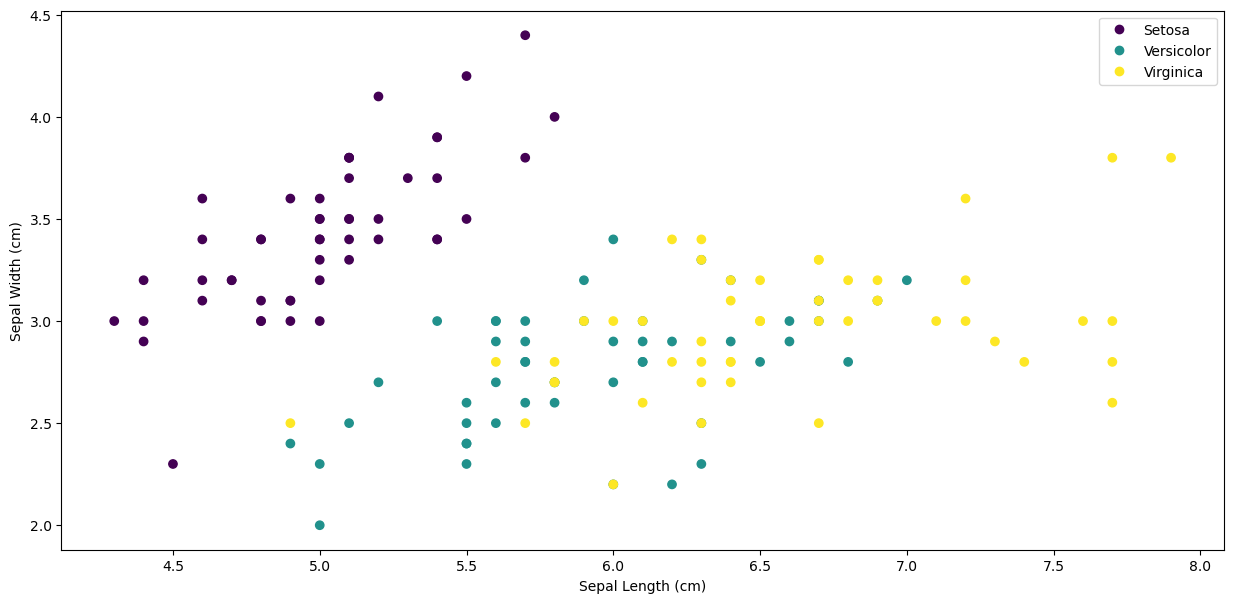

In [15]:
## Scatterplot - Sepal Length & Sepal Width

fig, ax = plt.subplots(figsize=(15,7))
scatter = ax.scatter(data=df_iris, x='sepal length (cm)', y='sepal width (cm)', c=df_iris['Type'])
ax.set(xlabel='Sepal Length (cm)', ylabel='Sepal Width (cm)')
fig = ax.legend(scatter.legend_elements()[0], df_iris['Target Names'].unique(), loc=0)
plt.show()

### Preprocessing (Chapter 6)
- Used for preventing overfitting in Multi Linear Regression model
  
- 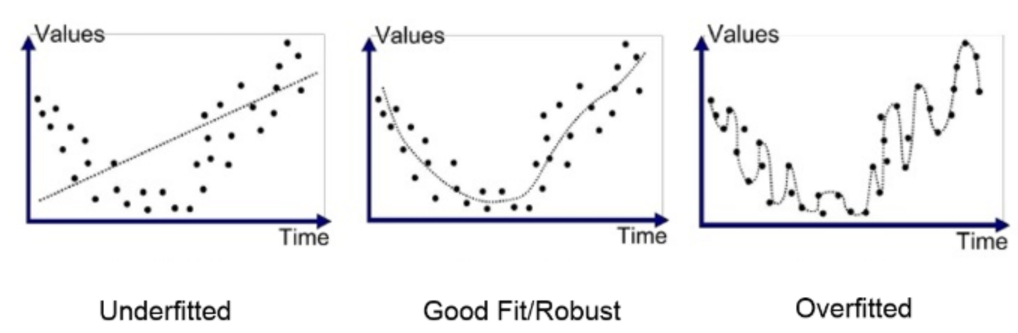

- Select features to use // use all features but smaller parameters
- Left - High Bias / Right - High Variance

#### Subset Reduction
- Forward Selection
- 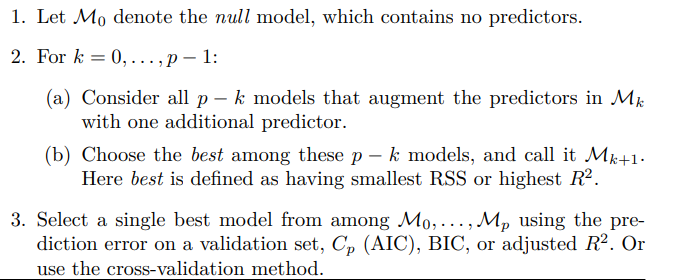

- Backward Selection
- 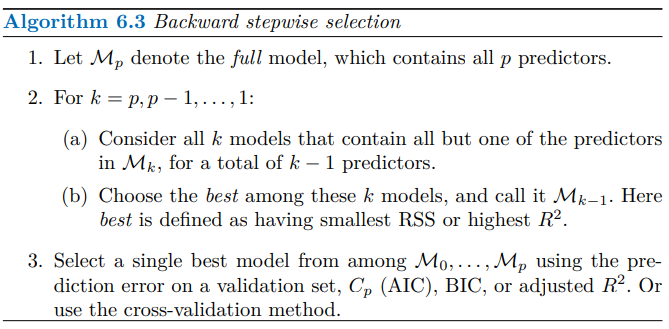

In [ ]:
# Subset Reduction
#   > Forward / Backward

# 무엇이고 / 어떻게하고 / 어떤 장&단점
# sklearn SelectKBest
# 장점 - Improved prediction accuracy / avoid overfitting
# 단점 - Hinder relationships among input features / may not correctly capture the "best" features

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

X_new = SelectKBest(k=3).fit_transform(X_train, y_train)
X_new

array([[4.6, 1. , 0.2],
       [5.7, 1.5, 0.4],
       [6.7, 4.4, 1.4],
       [4.8, 1.6, 0.2],
       [4.4, 1.3, 0.2],
       [6.3, 5. , 1.9],
       [6.4, 4.5, 1.5],
       [5.2, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.2, 1.5, 0.1],
       [5.8, 5.1, 1.9],
       [6. , 4.5, 1.6],
       [6.7, 4.7, 1.5],
       [5.4, 1.3, 0.4],
       [5.4, 1.5, 0.2],
       [5.5, 3.7, 1. ],
       [6.3, 5.1, 1.5],
       [6.4, 5.5, 1.8],
       [6.6, 4.4, 1.4],
       [7.2, 6.1, 2.5],
       [5.7, 4.2, 1.3],
       [7.6, 6.6, 2.1],
       [5.6, 4.5, 1.5],
       [5.1, 1.4, 0.2],
       [7.7, 6.7, 2. ],
       [5.8, 4.1, 1. ],
       [5.2, 1.4, 0.2],
       [5. , 1.3, 0.3],
       [5.1, 1.9, 0.4],
       [5. , 3.5, 1. ],
       [6.3, 4.9, 1.8],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5.1, 1.7, 0.5],
       [5.6, 4.2, 1.3],
       [5.1, 1.5, 0.2],
       [5.7, 4.2, 1.2],
       [7.7, 6.7, 2.2],
       [4.6, 1.4, 0.2],
       [6.2, 4.3, 1.3],
       [5.7, 5. , 2. ],
       [5.5, 1.4

### Shrinkage
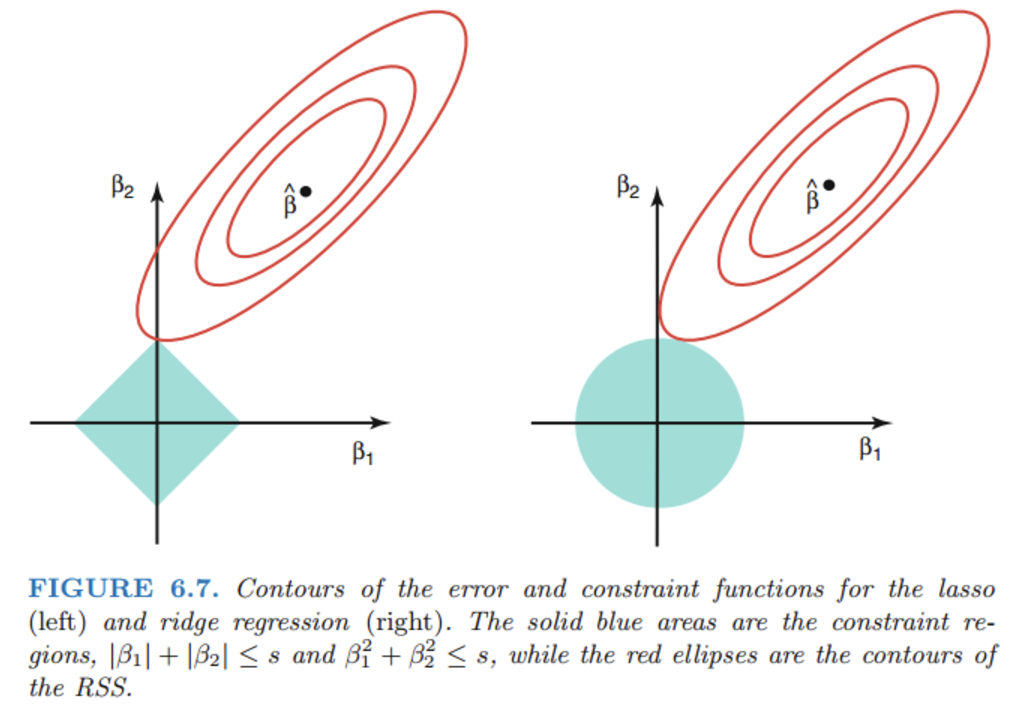

- Model fitting, with all p predictors / estimated coefficients are shrunken towards zero (relative to least squared estimates)
- Originally - only training accuracy // "generalization term"
- $\lambda$ - cross validation / gridsearch required to define the value, if 0 - same as least squared estimates // if large - coefficient goes towards zero

- Lasso - $\sum |x_n|$, uses absolute value - 특징 > coefficient를 0으로 만들수있음
- Ridge - $\sum x_n^2$, uses sum of squared values - 특징 > coefficient를 아예 0으로 만들지 못함

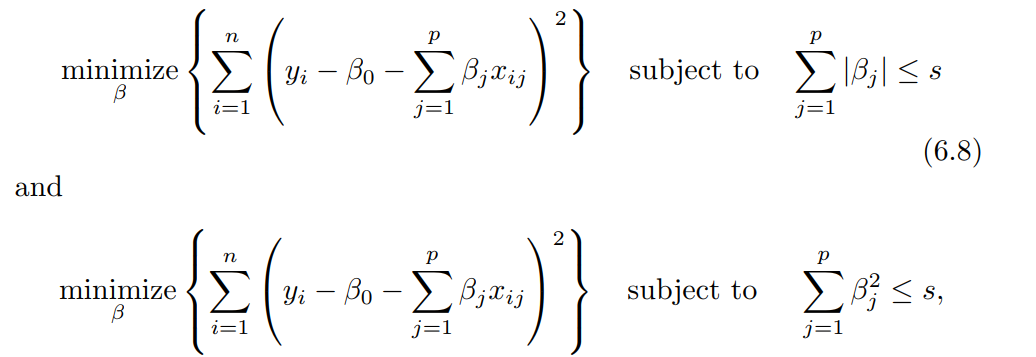

In [ ]:
# Shrinkage
#   > Lasso / Ridge

In [ ]:
# Decomposition
#   > PCA
# Reducing dimension of n x p data matrix
# 1st principal component - direction of data that is along which the observations vary the most // defines the line as close as possible to data


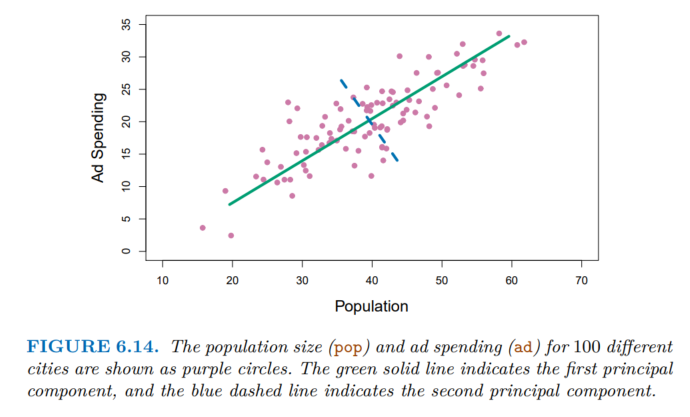

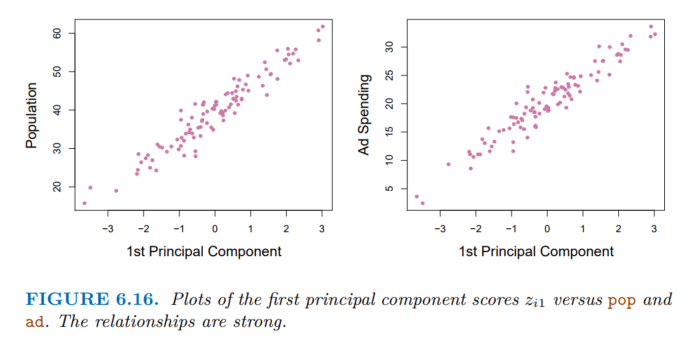

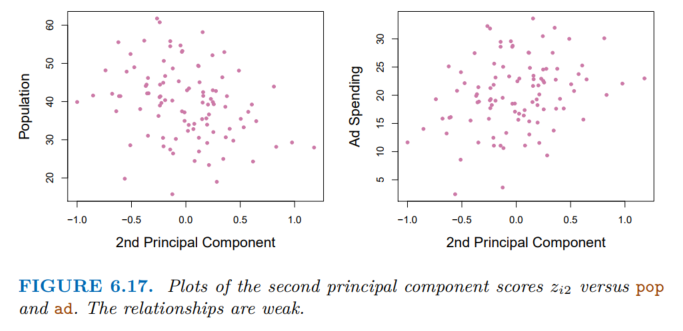

### ML (과제)

#### Naive Bayes
- Bayes' Theorem = $P(Y|X_1, ... , X_n) = \frac{P(X_1, ... , X_n | Y)*P(Y)}{P(X_1, ... , X_n)}$
  
- Posterior probability - 새로운 condition이 주어졌을때 특정 사건이 일어날 확률
  
- Given class variable Y, dependent feature vector Xn
- 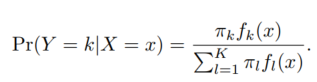

- Disadvantage - Features have to be independent of each other (which is almost not the case)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb.predict(X_test)

# y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [39]:
X_train.shape
X_test.shape

(30, 4)

In [33]:
y_test == gnb.predict(X_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

#### SVM
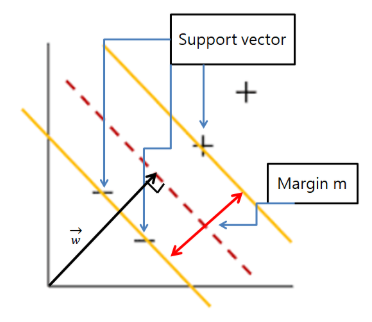
- 가장 margin이 최대가 되는 vector 찾기
- 2D인경우 vector / 3D인경우 plane...

- Advantage - High dimensional spaces / # of dimensions is greater than number of samples
- Disadvantage - X probability estimates, calculated with cross-validation

- One-Versus-One / One-Versus-All 비교

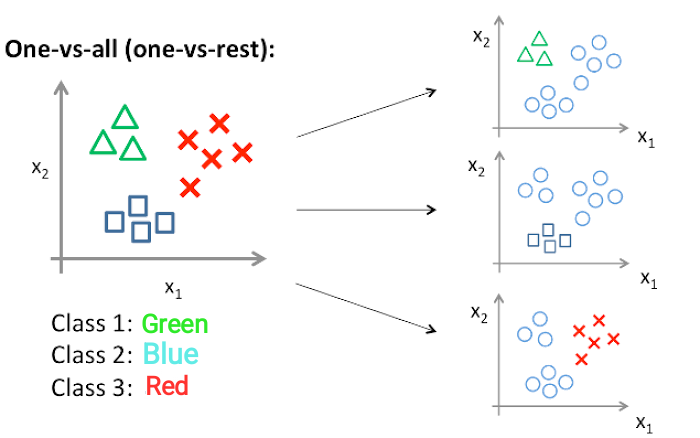

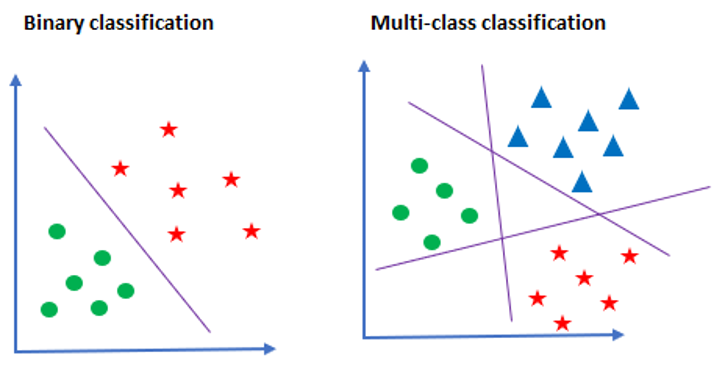

In [40]:
# SVM

# SVC with Linear Kernel
# NuSVR
# LinearSVR

from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
svm.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [42]:
y_test == svm.predict(X_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

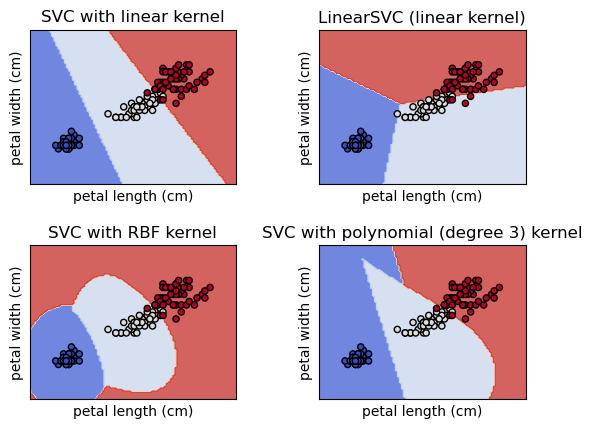

In [47]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, 2:]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[2],
        ylabel=iris.feature_names[3],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Cross-Validation